## 1) Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes = True)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as statm

from sklearn.preprocessing import LabelEncoder
import copy

## 2) Reading the data as a data frame

In [2]:
p_loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

## 3) Data Analysis and Preparation

In [3]:
p_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### a) Shape of the data

In [4]:
print(p_loan.columns)
print(p_loan.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


***- We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set. Also, we got 5000 rows which can be split into test & train datasets.***

### b) Data type of each attribute

In [5]:
p_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

***- Almost all atributes are numeric.***

### c) Missing value

In [6]:
p_loan.isna().apply(pd.value_counts)  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [7]:
val = p_loan.isnull().values.any()

if val==True:
    print("Missing values present : ", p_loan.isnull().values.sum())
    p_loan=p_loan.dropna()
else:
    print("No missing values present")

No missing values present


### d) Summary Statistics

In [8]:
p_loan.describe().T 

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


***- Here we can see, there are some negative values present in "Experience" feature which should be deleted, as Experience can not be negative.***

In [9]:
p_loan[p_loan['Experience'] < 0]['Experience'].count() #to get the count of negative values

52

In [10]:
p_loan['Experience'] = p_loan['Experience'].apply(abs) #Cleaning the negative values

In [11]:
p_loan[p_loan['Experience'] < 0]['Experience'].count() #to check if there are any negative value present or not

0

In [12]:
p_loan.describe().T #five point summary of the continuous attributes

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
p_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [14]:
p_loan.median() #finding median

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

### e) Finding unique data

In [15]:
p_loan.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### f) Measuring skewness

In [16]:
p_loan.skew(axis = 0, skipna = True) 

ID                     0.000000
Age                   -0.029341
Experience            -0.010038
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

### g) Distribution of numeric variables

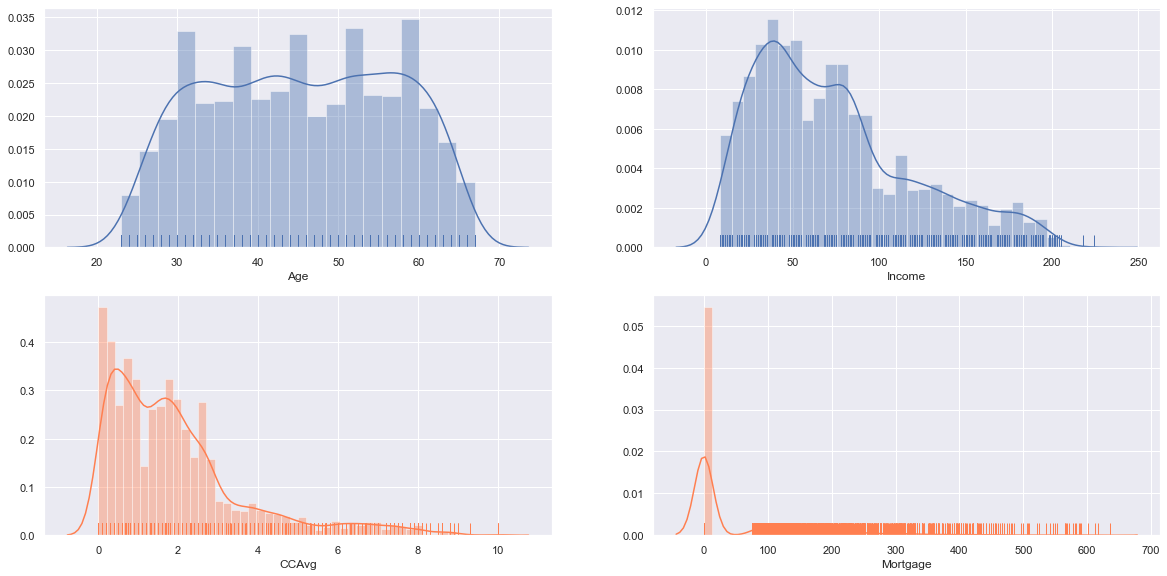

In [17]:
plt.figure(figsize = (20,15))

plt.subplot(3,2,1)
sns.distplot(p_loan['Age'], kde = True, rug = True)

plt.subplot(3,2,2)
sns.distplot(p_loan['Income'], kde = True, rug = True)

plt.subplot(3,2,3)
sns.distplot(p_loan['CCAvg'], kde = True, rug = True, color = "coral")

plt.subplot(3,2,4)
sns.distplot(p_loan['Mortgage'], kde = True, rug = True, color = "coral")

plt.show()

### h) Bi-variate distribution

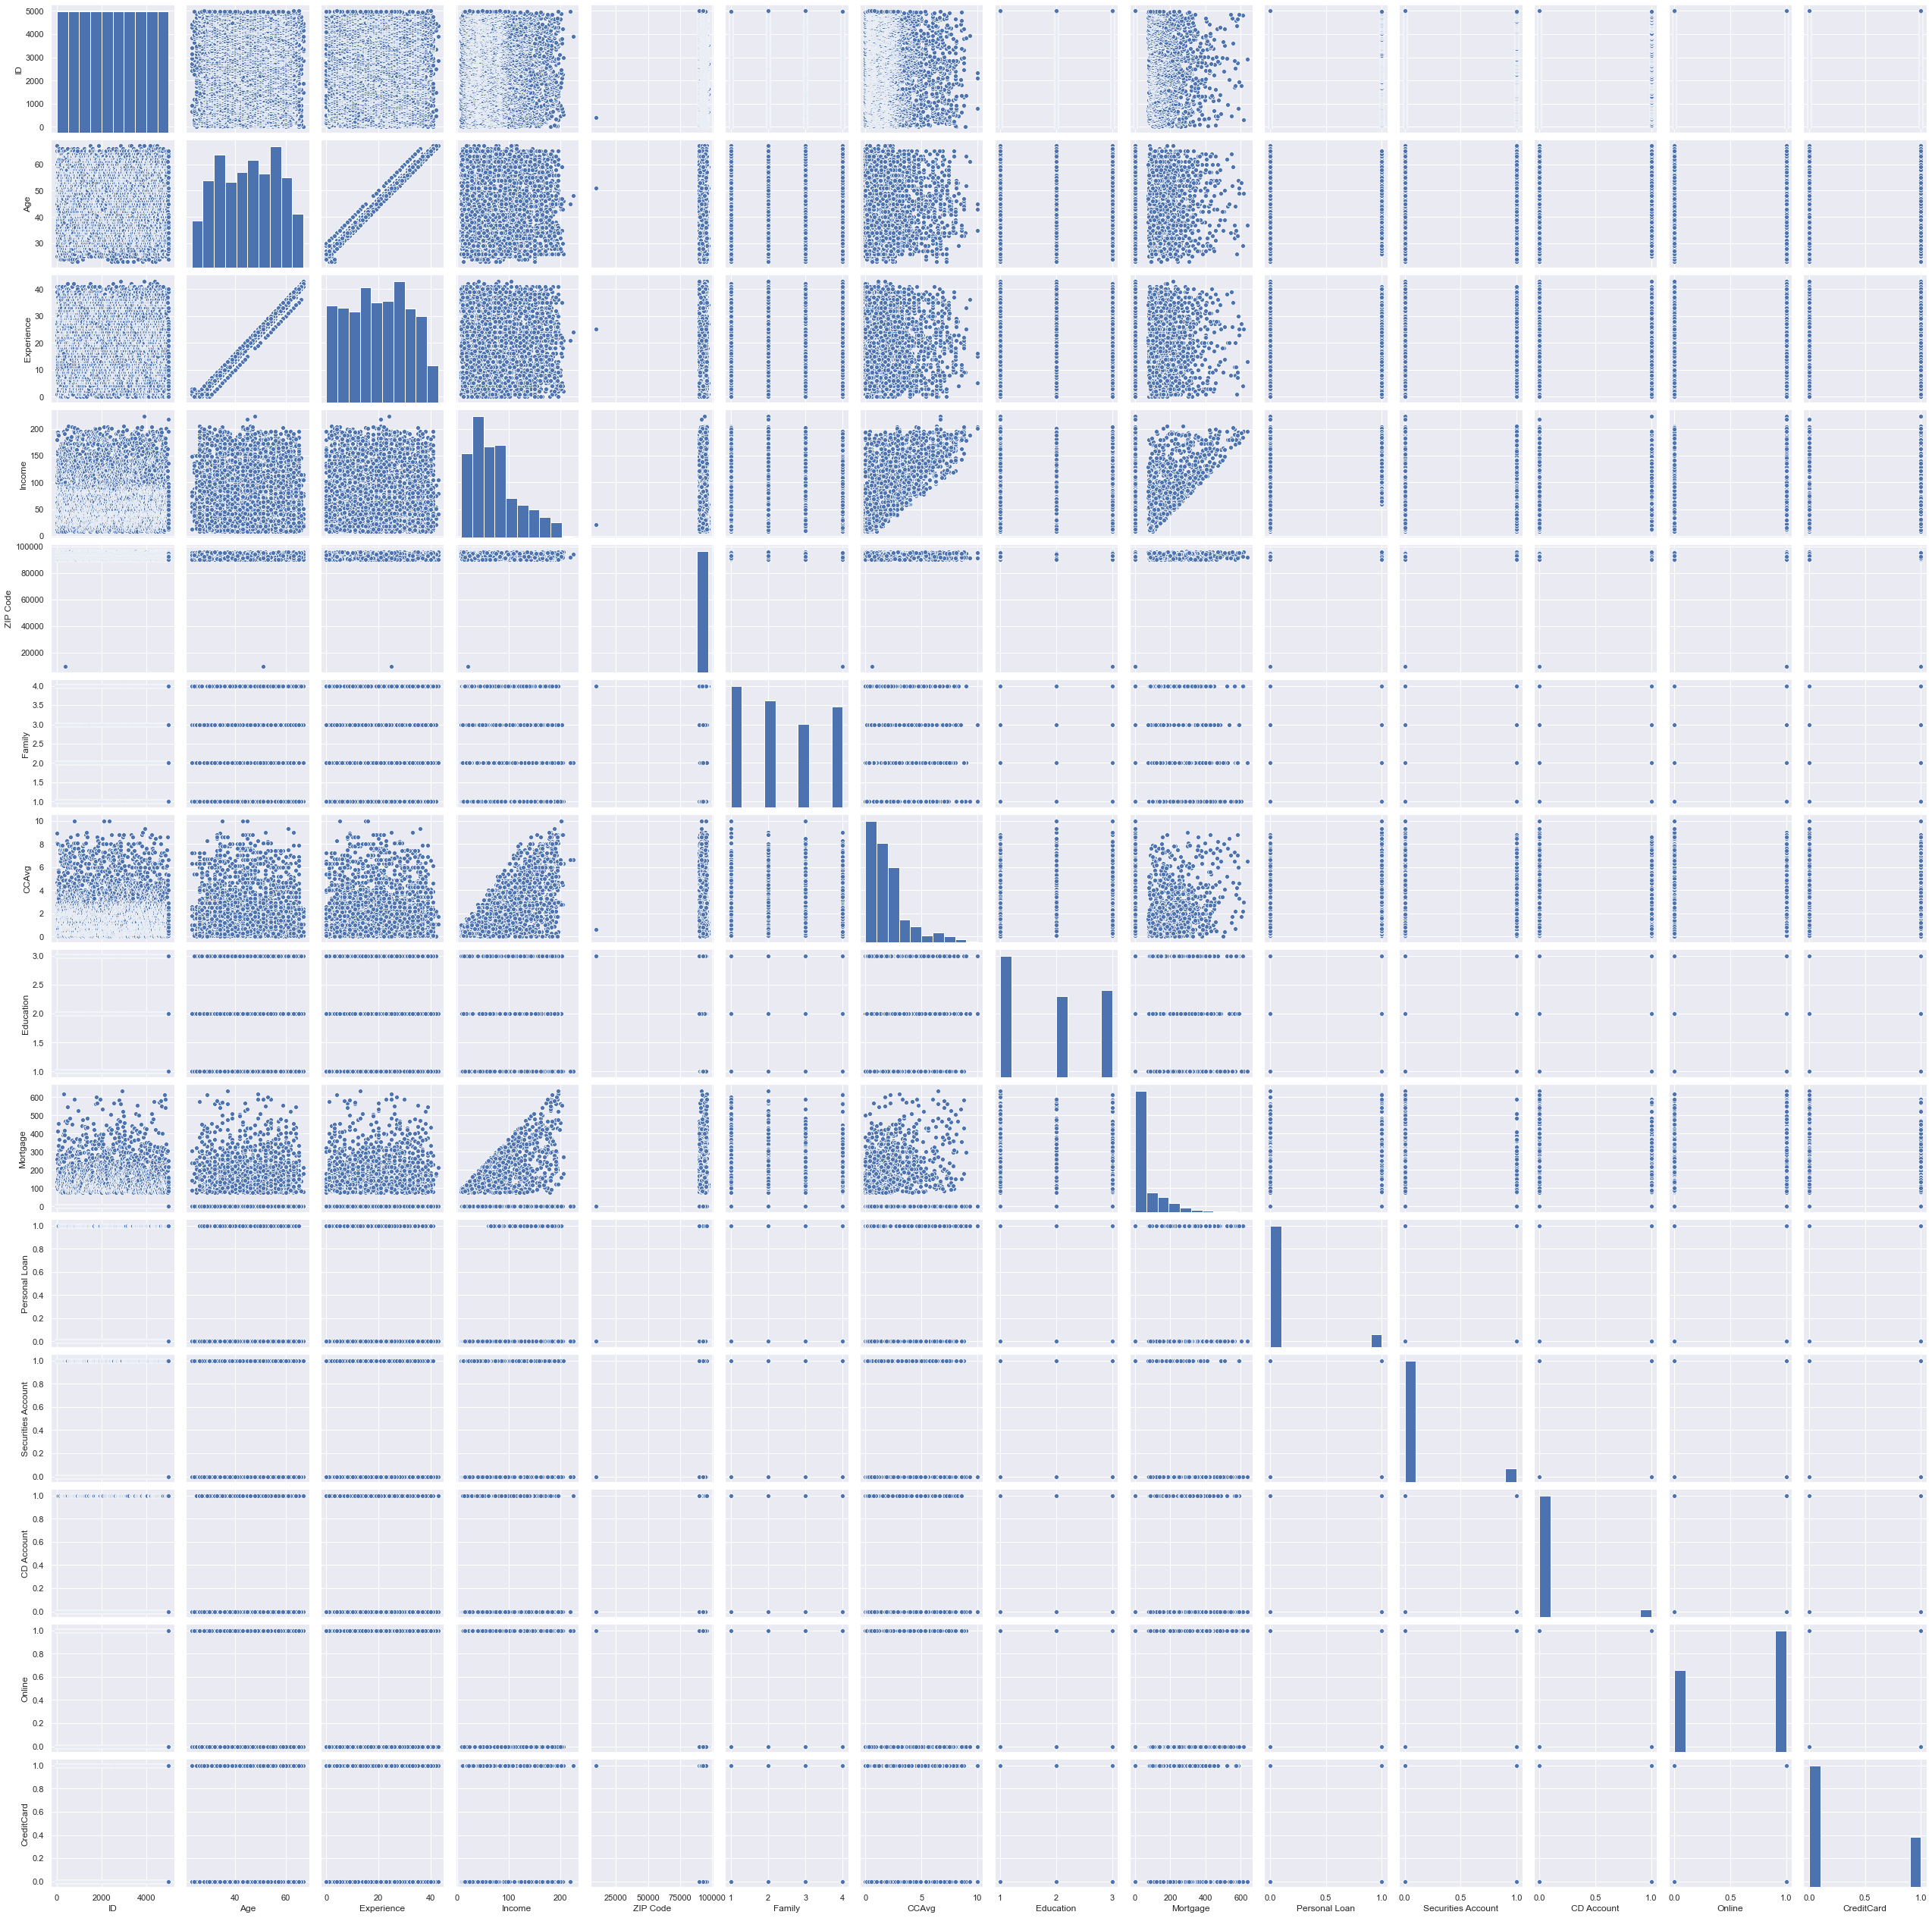

In [18]:
sns.pairplot(p_loan)
plt.show()

### Observations :

***1) Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.
The mean age of the customers is 45 with standard deviation of 11.5.
The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical.***

***2) The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337).***

***3) The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)***

***4) The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present.***

### i) Outlier Treatment

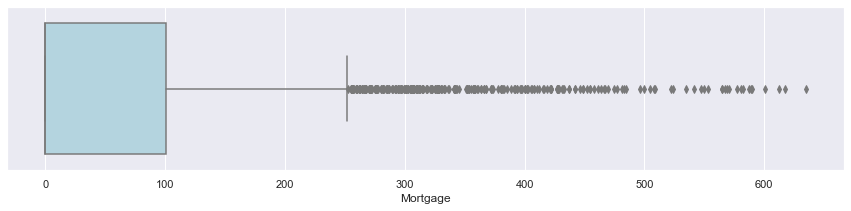

In [19]:
plt.figure(figsize= (15,3))
sns.boxplot(x= p_loan.Mortgage, color='lightblue')

plt.show()

In [20]:
p_loan['Mortgage_zscore'] = np.abs(stats.zscore(p_loan['Mortgage']))
p_loan = p_loan[p_loan['Mortgage_zscore']<3]
p_loan.drop('Mortgage_zscore', axis = 1, inplace = True)

In [21]:
p_loan.shape

(4895, 14)

***- Here I had chosen those rows only whose z_score is less than 3. Here we had dropped more than 100+ rows which contain outliers.***

### j) Correlation

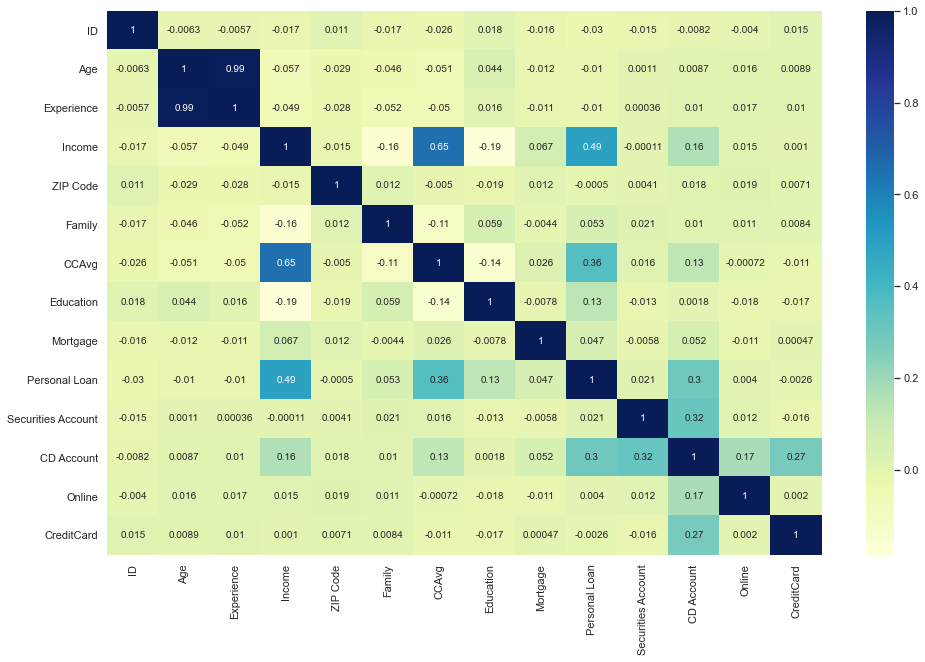

In [22]:
corr = p_loan.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap = "YlGnBu")
plt.show()

### Observations :

***1) Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.***

***2) Experience is highly correlated with Age.***

### k) Removing unneccesary columns

***- There is no need for ‘ID’, ‘ZIP_Code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series & ‘Experience’ is highly correlated with ‘Age’.***

In [23]:
p_loan.drop(['ID','ZIP Code', 'Experience'], axis=1, inplace=True) 

In [24]:
p_loan.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

## 3) Distribution of target column 

In [25]:
p_loan['Personal Loan'].value_counts()

0    4462
1     433
Name: Personal Loan, dtype: int64

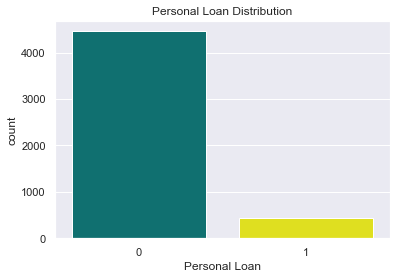

In [26]:
colors = ['teal', 'yellow']

plt.title('Personal Loan Distribution')
sns.countplot(x = 'Personal Loan', data = p_loan, palette = colors)
plt.show()

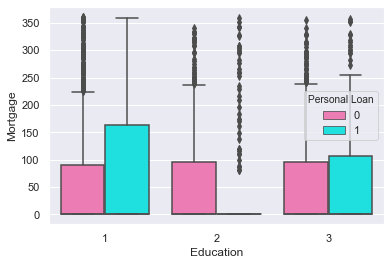

In [27]:
colors = ['hotpink', 'cyan']

sns.boxplot(x = "Education", y = "Mortgage", hue = "Personal Loan" , data = p_loan, palette = colors)
plt.show()

***- There are so many outliers in each case but the customers with and without Personal Loan have high Mortage.***

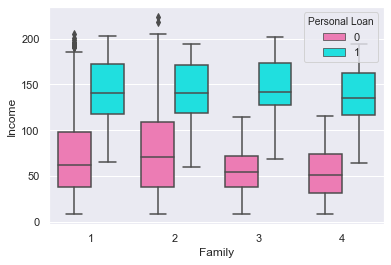

In [28]:
colors = ['hotpink', 'cyan']

sns.boxplot(x = "Family", y = "Income", hue = "Personal Loan" , data = p_loan, palette = colors)
plt.show()

***- Families with income less than 100K are less likely to take loan,than families with high income.***

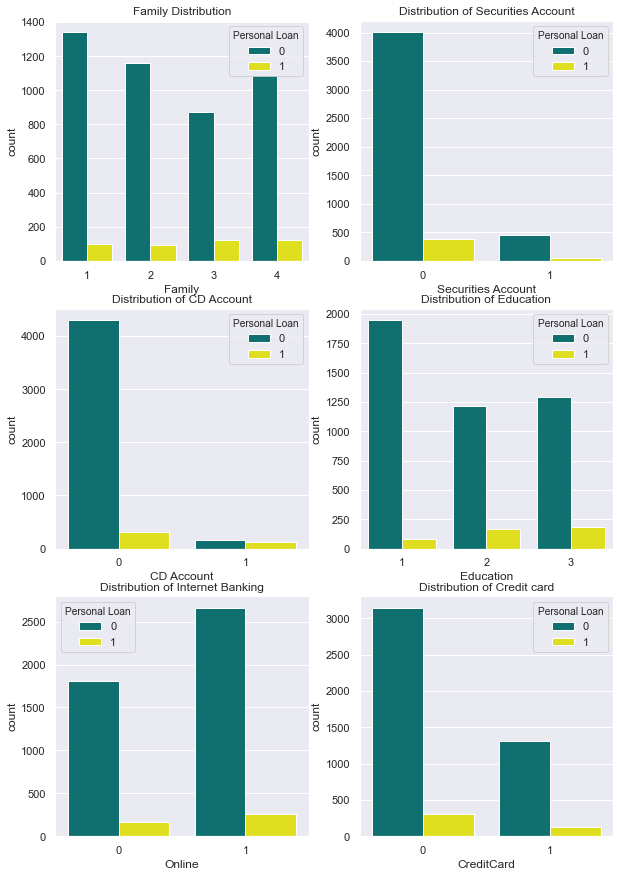

In [29]:
plt.figure(figsize = (10,15))

colors = ['teal', 'yellow']

plt.subplot(3,2,1)
plt.title('Family Distribution')
sns.countplot(x = 'Family', hue = 'Personal Loan', data = p_loan, palette = colors)

plt.subplot(3,2,2)
plt.title('Distribution of Securities Account')
sns.countplot(x = 'Securities Account', hue = 'Personal Loan', data = p_loan, palette = colors)

plt.subplot(3,2,3)
plt.title('Distribution of CD Account')
sns.countplot(x = 'CD Account', hue = 'Personal Loan', data = p_loan, palette = colors)

plt.subplot(3,2,4)
plt.title('Distribution of Education')
sns.countplot(x = 'Education', hue = 'Personal Loan', data = p_loan, palette = colors)

plt.subplot(3,2,5)
plt.title('Distribution of Internet Banking')
sns.countplot(x = 'Online', hue = 'Personal Loan', data = p_loan, palette = colors)

plt.subplot(3,2,6)
plt.title('Distribution of Credit card')
sns.countplot(x = 'CreditCard', hue = 'Personal Loan', data = p_loan, palette = colors)

plt.show()

### Observations :

***1) The number of family members not significantly affect probability.***

***2) The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.***

***3) The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.***

***4) we can infer that customers who are more educated have a higher probability of buying personal loans.***

***5) The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.***

***6) The customer who uses or doesn’t use a credit card issued by bank doesn’t seem to affect the probability of buying a personal loan.***

## 4) Spliting the data 
**We will use 70% of data for training and 30% for testing.**


In [2]:
from sklearn.model_selection import train_test_split

X = p_loan.drop('Personal Loan', axis = 1)
Y = p_loan['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

x_train.head()


NameError: name 'p_loan' is not defined

### Lets check split of data

In [31]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(p_loan.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(p_loan.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [32]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(p_loan.loc[p_loan['Personal Loan'] == 1]), (len(p_loan.loc[p_loan['Personal Loan'] == 1])/len(p_loan.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(p_loan.loc[p_loan['Personal Loan'] == 0]), (len(p_loan.loc[p_loan['Personal Loan'] == 0])/len(p_loan.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 433 (8.85%)
Original Personal Loan False Values   : 4462 (91.15%)

Training Personal Loan True Values    : 305 (8.90%)
Training Personal Loan False Values   : 3121 (91.10%)

Test Personal Loan True Values        : 128 (8.71%)
Test Personal Loan False Values       : 1341 (91.29%)



# 5) Classification models  

# Logistic Regression Model

In [33]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

# Fit the model on train
LogReg = LogisticRegression(solver="liblinear")
LogReg.fit(x_train, y_train)

#predict on test
y_predict = LogReg.predict(x_test)


coef_df = pd.DataFrame(LogReg.coef_)
coef_df['intercept'] = LogReg.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.018954  0.043385  0.377656  0.067444  1.214757  0.000544 -0.687622   

          7         8         9  intercept  
0  2.945151 -0.551752 -0.813984  -9.136125  


In [34]:
LogReg_score = LogReg.score(x_test, y_test)
print("Accuracy : %f" % LogReg_score)

Accuracy : 0.947583


### Evaluate Performance of Logistic Regression Model

### Classification Report and Confusion Matrix 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.81      0.52      0.63       128

    accuracy                           0.95      1469
   macro avg       0.89      0.75      0.80      1469
weighted avg       0.94      0.95      0.94      1469



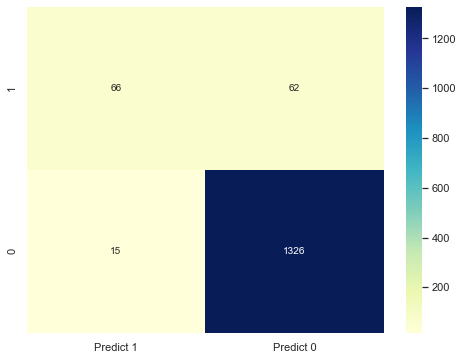

In [35]:
# Classification Report
print(classification_report(y_test, y_predict)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')

### Area under the ROC curvre

In [36]:
logR_curve = LogReg.predict_proba(x_test)

fpr1, tpr1, threshold1 = roc_curve(y_test, logR_curve[:,1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curvre : %f" % roc_auc1)

Area under the ROC curvre : 0.950847


### Observations :

***1) Here we got around 95% accuracy but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.***

***2) We got a recall for ‘1’ which in this case is 52%, So out of the total number of customers who actually bought personal loans our model is only able to pick 52% of customers of them to be correctly predicted.***

***3) The area under roc curve determines how our model performs. In this case, the area comes out to be around 95% which is good.***

## Lets try to get more accurate results with standardized data

## Standardization

In [37]:
from sklearn import preprocessing

column_names = p_loan.columns   #get the column names
scaler = preprocessing.StandardScaler()    #create the scaler object
scaled_x_train = scaler.fit_transform(x_train)     #fit the data into scaler object
scaled_x_test = scaler.fit_transform(x_test)

In [38]:
sc_LogReg = LogisticRegression(solver="liblinear")
sc_LogReg.fit(scaled_x_train, y_train)

#predict on test
sc_y_predict = sc_LogReg.predict(scaled_x_test)


coef_df = pd.DataFrame(sc_LogReg.coef_)
coef_df['intercept'] = sc_LogReg.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.061996  2.375685  0.683181  0.168803  1.340752  0.076361 -0.266956   

          7         8         9  intercept  
0  0.808775 -0.264444 -0.412842   -4.61197  


In [39]:
sc_LogReg_score = sc_LogReg.score(scaled_x_train, y_train)
print("Accuracy : %f" % sc_LogReg_score)

Accuracy : 0.953006


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469



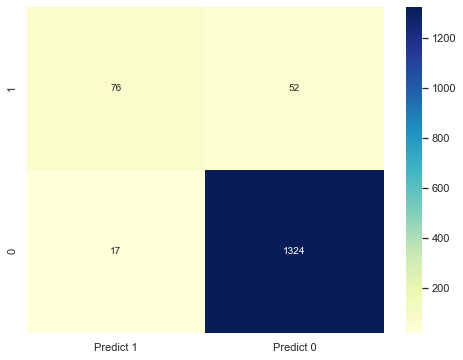

In [40]:
# Classification Report
print(classification_report(y_test, sc_y_predict)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, sc_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')

### Area under the ROC curvre

In [41]:
sc_logR_curve = sc_LogReg.predict_proba(scaled_x_test)

sc_fpr1, sc_tpr11, sc_threshold1 = roc_curve(y_test, sc_logR_curve[:,1])
sc_roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curvre : %f" % sc_roc_auc1)

Area under the ROC curvre : 0.950847


### Observations :

***1) We got almost same accuracy as previous but we got a recall value of 59%, which means our model did much better in predicting True Positives.***

***2) Also, the area under the curve is around 95%, which is same as previous value.***

# kNN Model

In [42]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [43]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(x_train, y_train)
    
    # predict the response
    y_pred = kNN.predict(x_test)
    
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


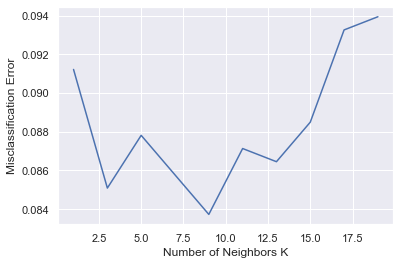

In [44]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [45]:
#Use k=9 as the final model for prediction
kNN = KNeighborsClassifier(n_neighbors = 9)

# fitting the model
kNN.fit(x_train, y_train)

# predict the response
y_pred = kNN.predict(x_test)
y_p = kNN.predict(x_train)

# evaluate accuracy
print("Accuracy : %f" % accuracy_score(y_test, y_pred))

Accuracy : 0.916270


### Evaluate Performance of kNN Model

### Classification Report and Confusion Matrix 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1341
           1       0.53      0.31      0.39       128

    accuracy                           0.92      1469
   macro avg       0.74      0.64      0.67      1469
weighted avg       0.90      0.92      0.91      1469



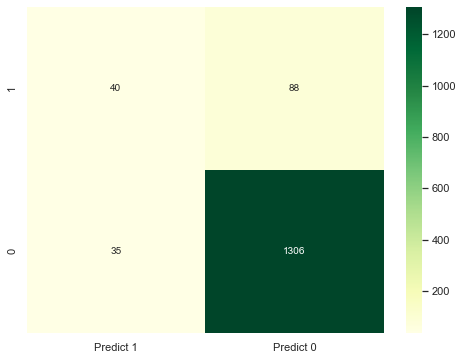

In [46]:
# Classification Report
print(classification_report(y_test, y_pred)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='YlGn', fmt='g')

### Area under the ROC curvre

In [47]:
kNN_curve = kNN.predict_proba(x_test)

fpr2, tpr2, threshold2 = roc_curve(y_test, kNN_curve[:,1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curvre : %f" % roc_auc2)

Area under the ROC curvre : 0.882501


### Observations :

***1) Here we got around 92% accuracy which is less compared to Logistic Regression model.***

***2) We got a recall for ‘1’ which in this case is 31%, So out of the total number of customers who actually bought personal loans our model is only able to pick 31% of customers of them to be correctly predicted.***

***3) The area under roc curve determines how our model performs. In this case, the area comes out to be 88% which is good.***

## Lets analyze the model with scaled data

In [48]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
sc_neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in sc_neighbors:
    sc_kNN = KNeighborsClassifier(n_neighbors=k)
    sc_kNN.fit(scaled_x_train, y_train)
    
    # predict the response
    sc_y_pred = sc_kNN.predict(scaled_x_test)
    
    # evaluate accuracy
    scores = accuracy_score(y_test, sc_y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
sc_optimal_k = sc_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % sc_optimal_k)

The optimal number of neighbors is 5


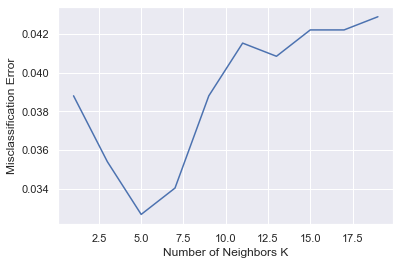

In [49]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(sc_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [50]:
#Use k=5 as the final model for prediction
sc_kNN = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
sc_kNN.fit(scaled_x_train, y_train)

# predict the response
sc_y_pred = sc_kNN.predict(scaled_x_test)
sc_y_p = sc_kNN.predict(scaled_x_train)

# evaluate accuracy
print("Accuracy : %f" % accuracy_score(y_test, sc_y_pred))

Accuracy : 0.967325


### Evaluate Performance of kNN Model

### Classification Report and Confusion Matrix 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1341
           1       0.94      0.66      0.78       128

    accuracy                           0.97      1469
   macro avg       0.96      0.83      0.88      1469
weighted avg       0.97      0.97      0.96      1469



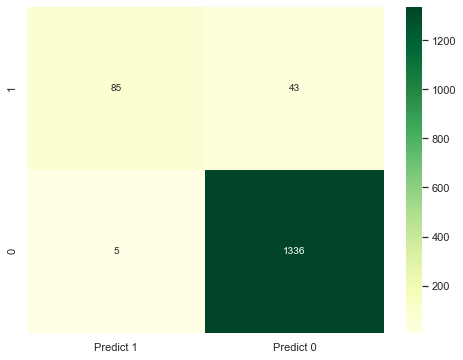

In [51]:
# Classification Report
print(classification_report(y_test, sc_y_pred)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, sc_y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='YlGn', fmt='g')

### Area under the ROC curvre

In [52]:
sc_kNN_curve = sc_kNN.predict_proba(scaled_x_test)

sc_fpr2, sc_tpr2, sc_threshold2 = roc_curve(y_test, sc_kNN_curve[:,1])
sc_roc_auc2 = auc(sc_fpr2, sc_tpr2)
print("Area under the ROC curvre : %f" % sc_roc_auc2)

Area under the ROC curvre : 0.936705


### Observations :

***1) Here we are with around 97% accuracy in determining if a customer will buy the personal loan or not. Also, the recall value is 66% is much better than Logistic Regression.***

***2) Also, the area under the curve is around 94%, which is fairly good than previous.***

 # Naive Bayes algorithm 

### we will analyze Naive Bayes models with only scaled data

In [53]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
NB = GaussianNB()

NB.fit(scaled_x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance of Naive Bayes model with training data

In [54]:
NB_predict = NB.predict(scaled_x_train)

from sklearn import metrics

print("Model Accuracy with training data: {0:.4f}".format(metrics.accuracy_score(y_train, NB_predict)))
print()

Model Accuracy with training data: 0.8940



### Performance of Naive Bayes model with testing data

In [55]:
NB_test_predict = NB.predict(scaled_x_test)

from sklearn import metrics

print("Model Accuracy with testing data: {0:.4f}".format(metrics.accuracy_score(y_test, NB_test_predict)))
print()

Model Accuracy with testing data: 0.8945



### Evaluate Performance of Naive Bayes Model

### Classification Report and Confusion Matrix 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.59      0.50       128

    accuracy                           0.89      1469
   macro avg       0.69      0.76      0.72      1469
weighted avg       0.91      0.89      0.90      1469



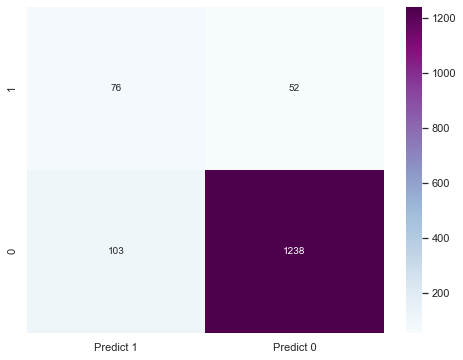

In [56]:
# Classification Report
print(classification_report(y_test, NB_test_predict)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, NB_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='BuPu', fmt='g')

### Area under the ROC curvre

In [57]:
NB_curve = NB.predict_proba(scaled_x_test)

fpr3, tpr3, threshold3 = roc_curve(y_test, NB_curve[:,1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curvre : %f" % roc_auc3)

Area under the ROC curvre : 0.924240


### Observations :

***1) We got an accuracy score of around 89% with a recall value of 59% which is less as compared to the kNN model.***

***2) Also, the area under the curve is around 92%, which is less as compared to the Logistic Regression and kNN model.***

# 6) Choosing the best model?

### Conclusion
***The aim of the Thera bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Three classification algorithms were used in this study.*** 

### For kNN model, We got 66% recall value with 97%% accuracy while the auc is 94%. It seems like kNN algorithm have the highest accuracy and we can choose that as our final model.